## DataSet

In [ ]:
''''
ANÁLISE DAS COLUNAS DO DATASET

https://www.kaggle.com/datasets/ahmeduzaki/los-angeles-california-earthquake-dataset?resource=download

++ latitude, longitude
-- mag 						    	| Magnitude local (ML) do evento
++ clustering_coefficient_30_days	 | Grau de agrupamento de eventos próximos nos últimos 30 dias
++ std_mag_30_days					| Desvio padrão das magnitudes em 30 dias
++ rolling_mean_depth_30_days		| Média móvel da profundidade dos terremotos nos últimos 30 dias
++ earthquakes_last_30_days			| Número total de terremotos registrados nos 30 dias anteriores
++ b_value							| Parâmetro da lei de Gutenberg-Richter
-- b_value_increment_i_i2 até b_value_increment_i8_i10 | Variações do b_value entre diferentes intervalos de tempo
-- max_mag_last_week				| Maior magnitude observada na última semana
++ eta								| Parâmetro estatístico relacionado à distribuição temporal dos eventos
++ delta_M							| Diferença de magnitude entre eventos consecutivos
++ elapsed_time						| Tempo decorrido desde o último evento significativo (em segundos)
-- coefficient_of_variation		 	 | Desvio padrão / média das magnitudes
-- dE1_2							| Diferença de energia entre eventos consecutivos
++ class							| Categoria de magnitude máxima esperada nos próximos 30 dias (variável alvo)

'''

"'\nANÁLISE DAS COLUNAS DO DATASET\n\n++ latitude, longitude\n-- mag \t\t\t\t\t\t    | Magnitude local (ML) do evento\n++ clustering_coefficient_30_days\t | Grau de agrupamento de eventos próximos nos últimos 30 dias\n++ std_mag_30_days\t\t\t\t\t| Desvio padrão das magnitudes em 30 dias\n++ rolling_mean_depth_30_days\t\t| Média móvel da profundidade dos terremotos nos últimos 30 dias\n++ earthquakes_last_30_days\t\t| Número total de terremotos registrados nos 30 dias anteriores\n++ b_value\t\t\t\t\t\t\t| Parâmetro da lei de Gutenberg-Richter\n-- b_value_increment_i_i2 até b_value_increment_i8_i10 | Variações do b_value entre diferentes intervalos de tempo\n-- max_mag_last_week\t\t\t\t| Maior magnitude observada na última semana\n++ eta\t\t\t\t\t\t\t\t| Parâmetro estatístico relacionado à distribuição temporal dos eventos\n++ delta_M\t\t\t\t\t\t\t| Diferença de magnitude entre eventos consecutivos\n++ elapsed_time\t\t\t\t\t| Tempo decorrido desde o último evento significativo (em segund

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import sklearn.tree as SKTree
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization

In [5]:
df_dataset = pd.read_csv('LosAngeles_Earthquake_Dataset.csv', sep=',', index_col=None)

df_dataset.shape

(22899, 20)

In [6]:
df_sorted = df_dataset.sort_values(by='earthquakes_last_30_days', ascending=False)

df_sorted.head(n=5)


,latitude,longitude,mag,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2,class
13792,33.894333,-117.779000,1.17,0.989413,0.448434,4.530962,1227,0.545870,-0.001100,0.002323,-0.002066,0.001778,-0.010632,1.23,0.204295,-1.148006,136643.930000,1.292847,48165.734426,1
13790,34.066667,-117.500000,1.08,0.989560,0.448736,4.522863,1226,0.546970,0.003423,-0.000966,0.002878,-0.009532,-0.005989,1.23,0.202801,-1.140146,116212.109998,1.192857,48180.920908,1
13791,34.023833,-117.215167,1.05,0.989548,0.448615,4.528940,1226,0.542461,-0.002314,-0.002998,-0.004785,-0.001495,-0.015184,1.23,0.204013,-1.172566,133670.489999,1.155190,48199.481453,1
13789,34.022167,-117.514167,0.75,0.989551,0.448918,4.522482,1225,0.544775,-0.000684,-0.002471,0.000819,-0.012871,-0.013731,1.46,0.203809,-1.155865,120448.740002,1.173630,48187.362675,1
13788,34.065833,-117.498833,0.86,0.989542,0.448975,4.523529,1224,0.543548,-0.004389,-0.000545,-0.012955,-0.009412,-0.016399,1.46,0.204338,-1.164706,119825.410000,1.126953,48192.016526,1


In [7]:
df_dataset.describe()

,latitude,longitude,mag,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2,class
count,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,22899.000000,2.289900e+04,22899.000000,2.289900e+04,22899.000000
mean,34.098283,-117.774704,1.242984,0.856713,0.513682,9.499822,187.486353,0.566452,-0.000012,-0.000019,-0.000017,-0.000012,-0.000008,2.011134,0.183617,-1.505311,8.572680e+05,1.178380,1.030659e+05,2.766802
std,0.217607,0.557759,0.533142,0.101443,0.086900,1.952025,169.563226,0.123275,0.036429,0.051324,0.062619,0.072082,0.080237,0.596065,0.012157,0.774624,3.851923e+05,0.287662,2.563266e+05,1.371584
min,33.191833,-119.320667,-0.340000,0.000000,0.000000,0.000000,0.000000,0.293007,-0.421920,-0.441820,-0.450243,-0.460616,-0.465576,0.760000,0.159844,-4.692859,2.914050e+03,0.696293,1.229661e+04,1.000000
25%,34.001333,-118.136167,0.880000,0.831420,0.467384,9.100554,122.000000,0.478825,-0.009439,-0.015564,-0.020930,-0.026094,-0.031177,1.600000,0.174250,-1.972016,6.761044e+05,1.005826,2.894654e+04,2.000000
50%,34.054167,-117.539167,1.130000,0.856743,0.507376,9.972286,142.000000,0.554938,0.000115,0.000000,0.000124,0.000254,0.000243,1.910000,0.181145,-1.454941,8.873355e+05,1.120812,4.333446e+04,3.000000
75%,34.208167,-117.313000,1.500000,0.889982,0.559472,10.509430,177.000000,0.641688,0.009778,0.016235,0.021777,0.027361,0.032104,2.320000,0.190756,-1.001759,1.094321e+06,1.272317,7.783019e+04,4.000000
max,34.942167,-117.158333,5.496776,0.992260,0.765815,15.568651,1227.000000,1.117587,0.420602,0.470425,0.473283,0.474226,0.474092,5.496776,0.236607,1.157047,2.365254e+06,6.284059,3.337624e+06,6.000000


## EDA

In [8]:
df = df_dataset.drop(columns=[
	'b_value_increment_i_i2',
	'b_value_increment_i2_i4',
	'b_value_increment_i4_i6',
	'b_value_increment_i6_i8',
	'b_value_increment_i8_i10',
	'mag',
	'max_mag_last_week',
	'coefficient_of_variation',
	'dE1_2'
])
df.shape

(22899, 11)

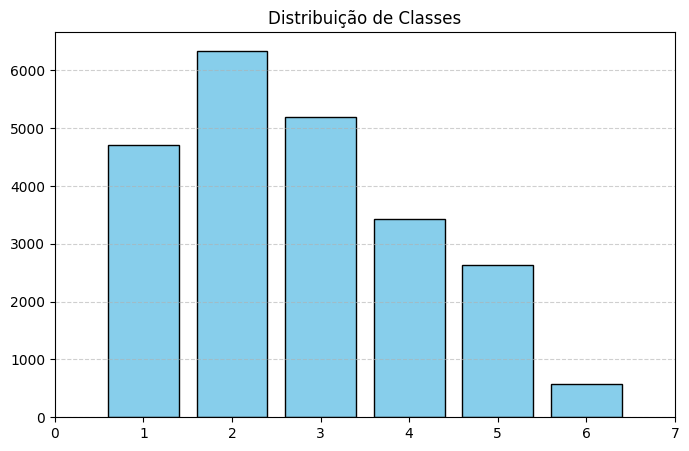

In [9]:
class_counts = df['class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

plt.title('Distribuição de Classes')
plt.xticks(range(0, 8))

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

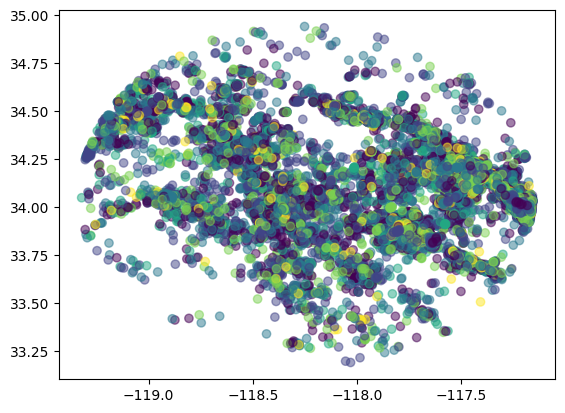

In [10]:
plt.scatter(df['longitude'], df['latitude'], c=df['class'], alpha=0.5)

<Axes: xlabel='class', ylabel='earthquakes_last_30_days'>

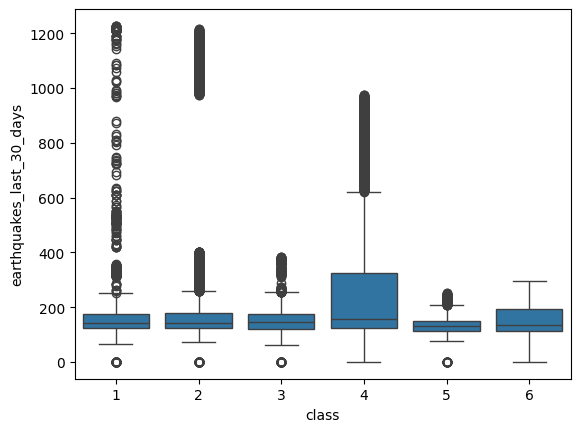

In [11]:
sns.boxplot(x=df['class'], y=df['earthquakes_last_30_days'])

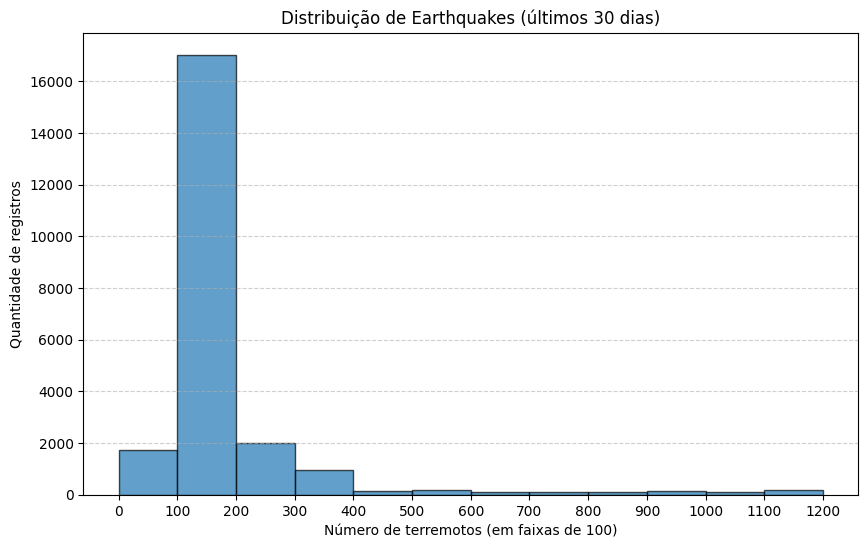

In [12]:
bins = range(0, 1300, 100)

plt.figure(figsize=(10, 6))
plt.hist(df['earthquakes_last_30_days'], bins=bins, edgecolor='black', alpha=0.7)

plt.title('Distribuição de Earthquakes (últimos 30 dias)')
plt.xlabel('Número de terremotos (em faixas de 100)')
plt.ylabel('Quantidade de registros')
plt.xticks(bins)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Axes: xlabel='class', ylabel='clustering_coefficient_30_days'>

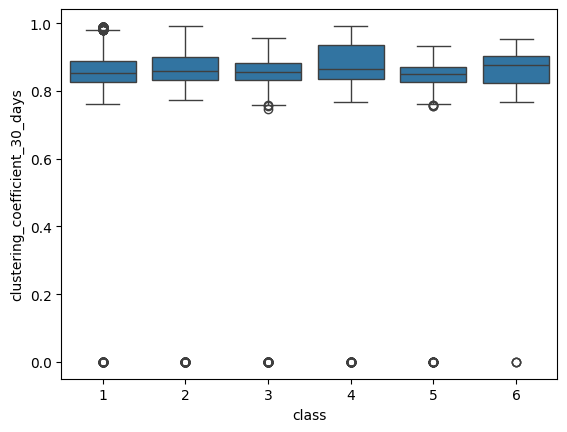

In [13]:
sns.boxplot(x=df['class'], y=df['clustering_coefficient_30_days'])

<Axes: xlabel='class', ylabel='b_value'>

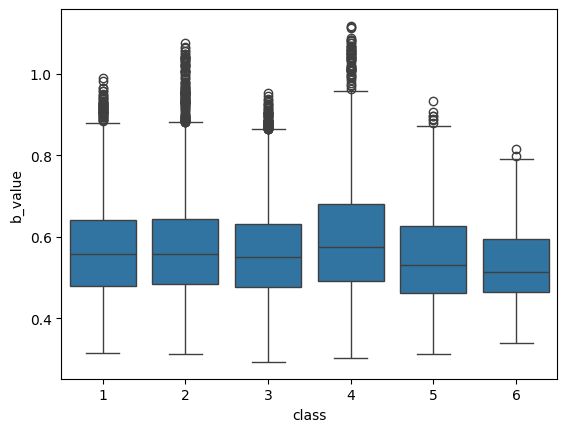

In [14]:
sns.boxplot(x=df['class'], y=df['b_value'])

<Axes: xlabel='class', ylabel='eta'>

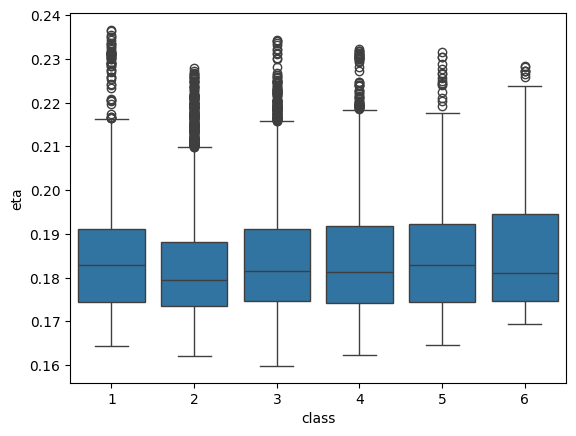

In [15]:
sns.boxplot(x=df['class'], y=df['eta'])

<Axes: xlabel='class', ylabel='elapsed_time'>

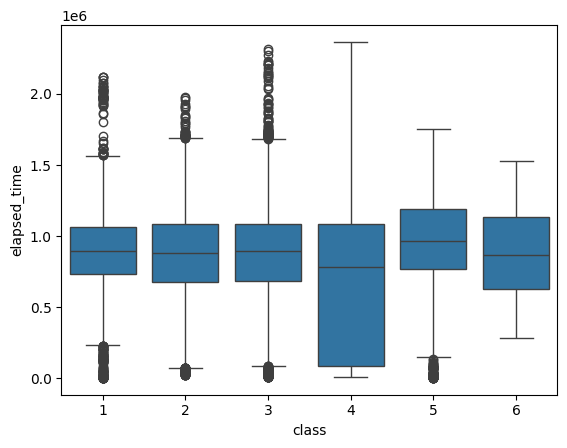

In [16]:
sns.boxplot(x=df['class'], y=df['elapsed_time'])

<Axes: >

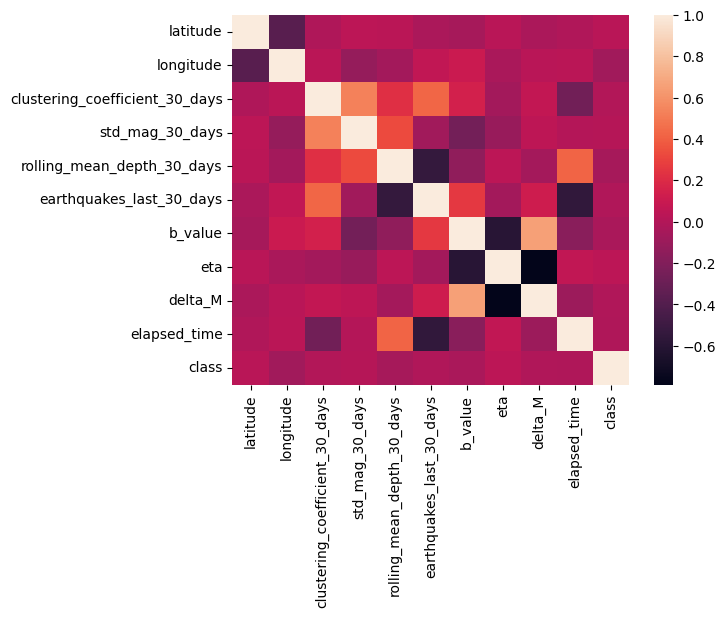

In [17]:
sns.heatmap(df.corr(), annot=False)

## Pré Processamento

In [18]:
X = df.drop(columns=["class"])
y = df["class"]

print(X.isna().sum())
print(X.describe())

latitude                          0
longitude                         0
clustering_coefficient_30_days    0
std_mag_30_days                   0
rolling_mean_depth_30_days        0
earthquakes_last_30_days          0
b_value                           0
eta                               0
delta_M                           0
elapsed_time                      0
dtype: int64
           latitude     longitude  clustering_coefficient_30_days  \
count  22899.000000  22899.000000                    22899.000000   
mean      34.098283   -117.774704                        0.856713   
std        0.217607      0.557759                        0.101443   
min       33.191833   -119.320667                        0.000000   
25%       34.001333   -118.136167                        0.831420   
50%       34.054167   -117.539167                        0.856743   
75%       34.208167   -117.313000                        0.889982   
max       34.942167   -117.158333                        0.992260   

     

In [19]:
X["elapsed_time"] = np.log1p(X["elapsed_time"])
X["earthquakes_last_30_days"] = np.log1p(X["earthquakes_last_30_days"])

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=2019
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16029, 10)
(6870, 10)
(16029,)
(6870,)


In [22]:
y.value_counts(normalize=True).sort_index()

class
1    0.205730
2    0.276999
3    0.227128
4    0.150094
5    0.114983
6    0.025067
Name: proportion, dtype: float64

## KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# Results
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score = metrics.f1_score(y_test, y_pred_knn, average='weighted')

print(f'Acurácia: {knn_accuracy:.2f}')
print("F1 Score (weighted):", knn_f1_score)

Acurácia: 0.81
F1 Score (weighted): 0.8096012167590794


## Naive Bayes

In [24]:
rl = GaussianNB()
rl.fit(X_train, y_train)

y_pred_nb = rl.predict(X_test)

# Results
nb_accuracy = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score = metrics.f1_score(y_test, y_pred_nb, average='weighted')

print(f'Acurácia: {nb_accuracy:.2f}')
print("F1 Score (weighted):", nb_f1_score)

Acurácia: 0.24
F1 Score (weighted): 0.2297246088887598


## Árvore de Decisão

In [25]:
dtree = SKTree.DecisionTreeClassifier(criterion='entropy', max_depth=25, class_weight='balanced')
dtree = dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test);

# Results
dtree_accuracy = metrics.accuracy_score(y_test, y_pred_dtree)
dtree_f1_score = metrics.f1_score(y_test, y_pred_dtree, average='weighted')

print(f'Acurácia: {dtree_accuracy:.2f}')
print("F1 Score (weighted):", dtree_f1_score)

Acurácia: 0.88
F1 Score (weighted): 0.882308138032115


## Regressão Logística

In [36]:
normalizer = Normalization()
normalizer.adapt(X_train)

rl = keras.Sequential([
    normalizer,
    layers.Dense(7,  activation='softmax')
])

rl.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

rl_history = rl.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0,
    )

y_pred_train = rl.predict(X_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)

y_pred_test = rl.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Results
rl_accuracy = metrics.accuracy_score(y_test,  y_pred_test_classes)
rl_f1_score = metrics.f1_score(y_test, y_pred_test_classes, average='weighted')

print(f'Acurácia: {rl_accuracy:.2f}')
print("F1 Score (weighted):", rl_f1_score)

501/501 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step
Acurácia: 0.31
F1 Score (weighted): 0.2867159695360518


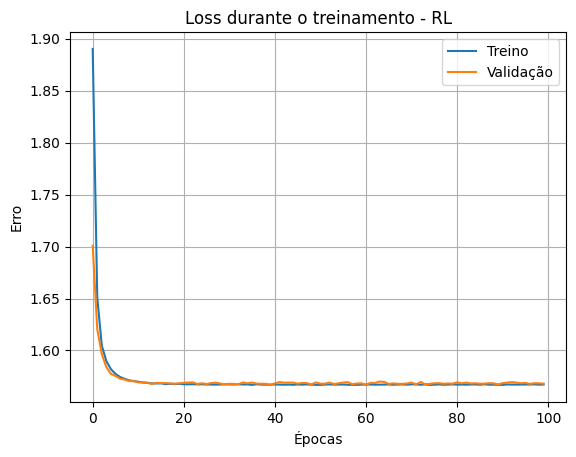

In [44]:
plt.plot(rl_history.history['loss'], label='Treino')
plt.plot(rl_history.history['val_loss'], label='Validação')
plt.title('Loss durante o treinamento - RL')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.show()

## Redes Neurais

In [38]:
normalizer_rn = Normalization()
normalizer_rn.adapt(X_train)

rn = keras.Sequential([
    normalizer_rn,
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(8, activation='softmax')
])

rn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

rn_history = rn.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

y_pred_rn = np.argmax(rn.predict(X_test), axis=1)

# Results
rn_accuracy = metrics.accuracy_score(y_test,  y_pred_rn)
rn_f1_score = metrics.f1_score(y_test, y_pred_rn, average='weighted')

print(f'Acurácia: {rn_accuracy:.2f}')
print("F1 Score (weighted):", rn_f1_score)

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
Acurácia: 0.84
F1 Score (weighted): 0.8424947176021643


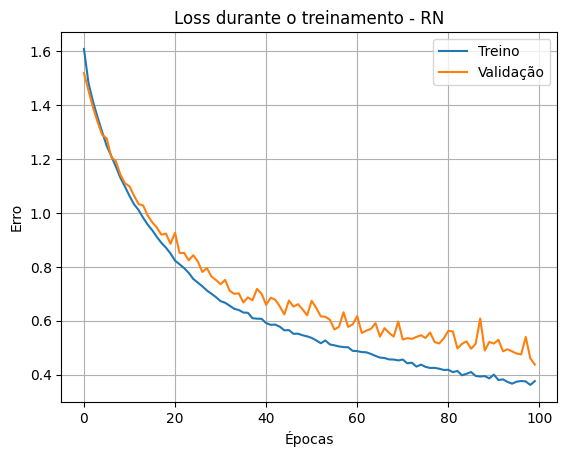

In [43]:
#Gráfico de Loss

plt.plot(rn_history.history['loss'], label='Treino')
plt.plot(rn_history.history['val_loss'], label='Validação')
plt.title('Loss durante o treinamento - RN')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.show()

## Resultados

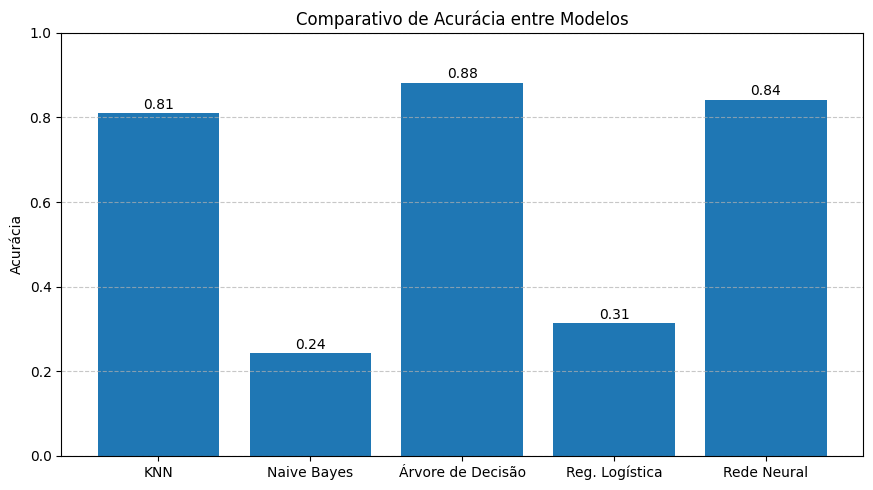

In [40]:
model_names = ['KNN', 'Naive Bayes', 'Árvore de Decisão', 'Reg. Logística', 'Rede Neural']

accuracies = [knn_accuracy, nb_accuracy, dtree_accuracy, rl_accuracy, rn_accuracy]

plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
bars1 = plt.bar(model_names, accuracies)
plt.title('Comparativo de Acurácia entre Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


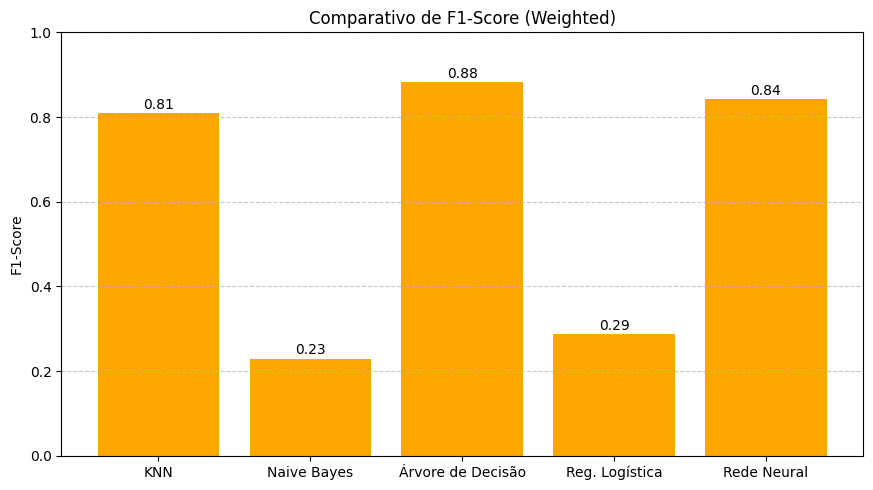

In [41]:
f1_scores  = [knn_f1_score, nb_f1_score, dtree_f1_score, rl_f1_score, rn_f1_score]

plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 2)
bars2 = plt.bar(model_names, f1_scores, color='orange')
plt.title('Comparativo de F1-Score (Weighted)')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

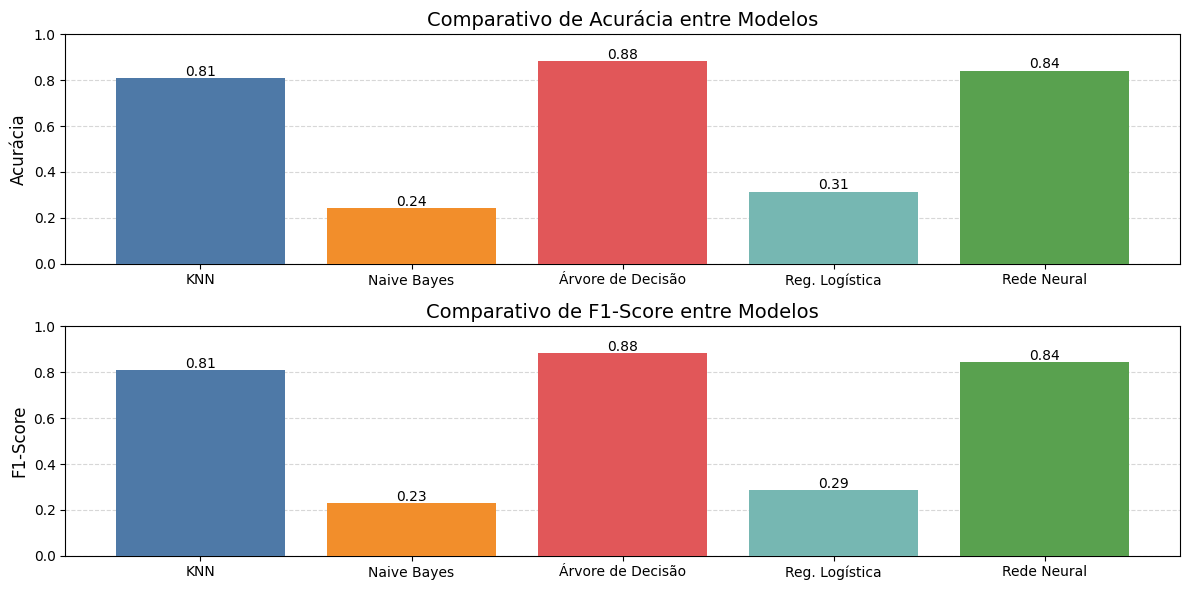

In [51]:
model_names = ['KNN', 'Naive Bayes', 'Árvore de Decisão', 'Reg. Logística', 'Rede Neural']

accuracies = [knn_accuracy, nb_accuracy, dtree_accuracy, rl_accuracy, rn_accuracy]
f1_scores  = [knn_f1_score, nb_f1_score, dtree_f1_score, rl_f1_score, rn_f1_score]

colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']

plt.figure(figsize=(12, 6))

# Gráfico: Acurácia
plt.subplot(2, 1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
bars1 = plt.bar(model_names, accuracies, color=colors, zorder=3)
plt.title('Comparativo de Acurácia entre Modelos', fontsize=14)
plt.ylabel('Acurácia', fontsize=12)
plt.ylim(0, 1)

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', fontsize=10)

# Gráfico: F1-Score
plt.subplot(2, 1, 2)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
bars2 = plt.bar(model_names, f1_scores, color=colors, zorder=3)
plt.title('Comparativo de F1-Score entre Modelos', fontsize=14)
plt.ylabel('F1-Score', fontsize=12)
plt.ylim(0, 1)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{bar.get_height():.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
